In [3]:
using Pkg
using Optim
using PyPlot
using LinearAlgebra
using FFTW

In [4]:
function demand(p,g,delta)
    n = length(p)
    result = zeros(n)
    ps = vcat(p,[0])
    result[1] = 1-(ps[1]-delta*ps[2])/(1-delta)
    for i= 2:(n)
        top = (ps[i-1] - delta*ps[i])/(1-delta)
        bot = (ps[i] - delta*ps[i+1])/(1-delta)
        result[i] = g(top) - g(bot)
    end
    return result
end

f1(p) = clamp(p,0, 1)
u1(p,g) = p.*(demand(p,g,.9))

demand([.1,0.05],f1,.9)
#println(u1([.9,.7,.5,.4], f1, .6))

2-element Array{Float64,1}:
 0.44999999999999984 
 0.050000000000000044

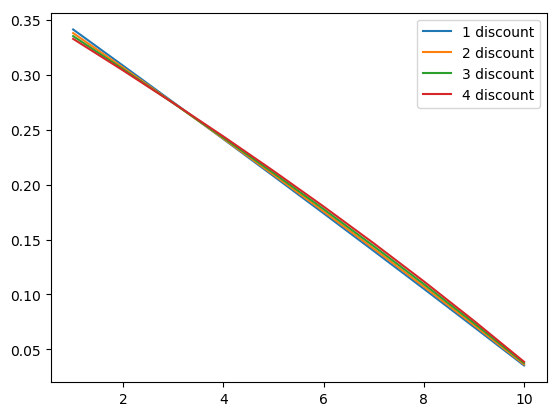

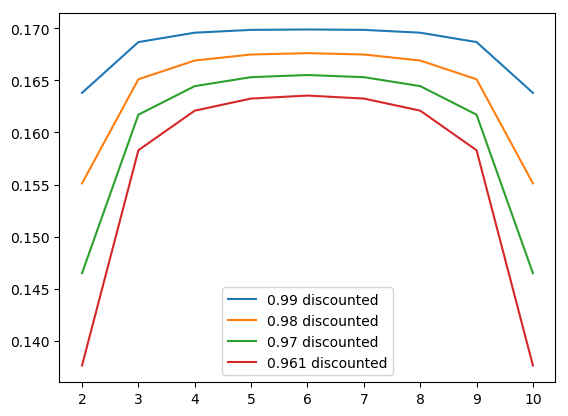

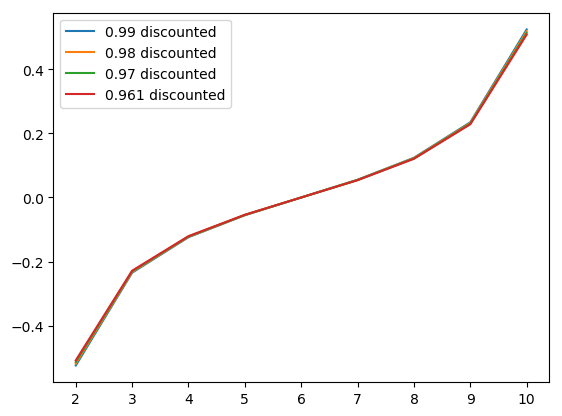

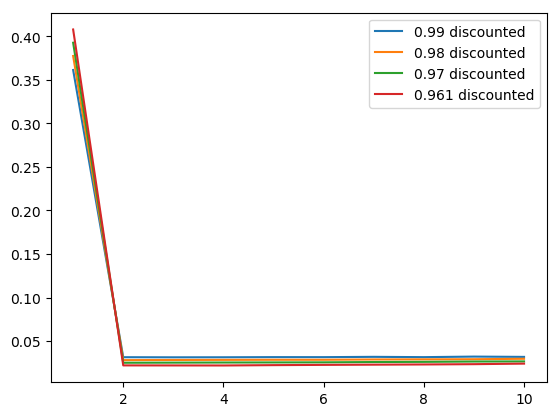

[0.341128, 0.308068, 0.274831, 0.241384, 0.207708, 0.173796, 0.13962, 0.105189, 0.0704368, 0.0353968]
[0.361335, 0.0314661, 0.0313426, 0.0313887, 0.0315569, 0.0315265, 0.031885, 0.0315408, 0.0321619, 0.0318289]
------
[0.33789, 0.306259, 0.274239, 0.241804, 0.208923, 0.175558, 0.141655, 0.107194, 0.0721264, 0.0363998]
[0.377437, 0.0281179, 0.0282963, 0.0284125, 0.0285271, 0.0285248, 0.0288799, 0.0290052, 0.0291338, 0.0296675]
------
[0.335112, 0.304864, 0.274043, 0.242601, 0.210486, 0.177632, 0.143968, 0.109445, 0.0739896, 0.0375392]
[0.392655, 0.0250938, 0.0252375, 0.0253736, 0.0254658, 0.0255696, 0.0259336, 0.0261241, 0.0265047, 0.0266508]
------
[0.3326, 0.303764, 0.274175, 0.243745, 0.212374, 0.180002, 0.146549, 0.111926, 0.0760255, 0.0387449]
[0.407874, 0.0220608, 0.0220172, 0.021968, 0.0223562, 0.0226532, 0.0229059, 0.0231392, 0.0234755, 0.024101]
------


In [8]:
function create_plot(n,l,u,g,beta)
    p0 = .1*ones(n) #- (1/n*collect(1:n))
    #p0 = zeros(n)
    xs = collect( 1:n )
    
    for i=1:l
        delta = beta^i
        obj(p) = -1*sum( (delta*ones(length(p))).^collect(1:length(p)) .*u(p,g) )
        res = optimize(obj,p0)
        ps = res.minimizer
        
        println(ps)
        println(demand(ps,g,.9))
        println("------")
        
        xs = collect( 1:length(ps) )
        figure(1)
        plot(xs, ps, label="$(i) discount")
        
        trans =  fft(ps)
        figure(2)
        plot(xs[2:end], real.(trans[2:end]), label="$(round(beta^i,digits=3)) discounted")
        
        figure(3)
        plot(xs[2:end], imag.(trans[2:end]), label="$(round(beta^i,digits=3)) discounted")
        
        
        figure(4)
        plot(xs, demand(ps,g,.9), label="$(round(beta^i,digits=3)) discounted")
    end
    
    figure(1)
    legend()
    show()
    savefig("results1.png")
    
    figure(2)
    legend()
    show()
    savefig("results2.png")
    
    figure(3)
    legend()
    show()
    savefig("results3.png")
    
    figure(4)
    legend()
    show()
    savefig("results3.png")
end

BETA = .99
create_plot(10,4,u1,f1,BETA)
